In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import stats
import itertools
import matplotlib.pyplot as plt
import cloveFunctions as clv


### comparing cldeg to demeter (achillies)
original implementation was in *ccle_results.ipynb*

In [22]:
# generate clDEG (vulnerability vector) in CCLE breast cloves
exp = pd.read_pickle('data/breast_mrna_df.pickle')
cnv = pd.read_csv('data/breast_CCLE_DEL_calls.csv.gz', index_col=0, compression='gzip')
hits = pd.read_csv('data/breast_ttest_real_samp.tab.gz', sep='\t', index_col=0, compression='gzip')

cldeg_ccle = clv.vulnerability_vector_count(exp, cnv, hits)
dep_breast = pd.read_csv('data/breast_Achilles_gene_dependency.csv.gz', compression='gzip', index_col=0)

corr = clv.correlate_df_cols(cldeg_ccle, dep_breast)
corr_null = clv.correlate_df_cols(cldeg_ccle, dep_breast,perm=True)
corr_null['pear_coeff']=corr_null['pear_coeff']-0.02

Ks_2sampResult(statistic=0.38461538461538464, pvalue=0.030782265216278876)


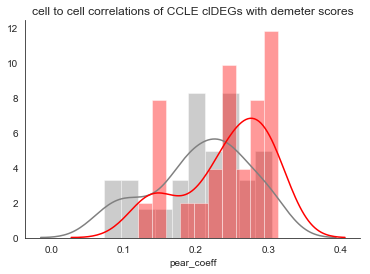

In [23]:
%matplotlib inline
sns.set_style("white")
sns.distplot(corr_null['pear_coeff'], color='gray',kde=True, norm_hist=True,bins=10)

sns.distplot(corr['pear_coeff'], color='red',kde=True,norm_hist=True,bins=10)
plt.title('cell to cell correlations of CCLE clDEGs with demeter scores')
sns.despine()

print(stats.ks_2samp(corr_null['pear_coeff'], corr['pear_coeff']))

In [75]:
cldeg_tcga = pd.read_csv('data/brca_het_clDEG_count.tab.gz', sep='\t', compression='gzip', index_col=0)

In [76]:
cldeg

TCGA-AR-A24V-01A  TCGA-A7-A26H-01A  TCGA-EW-A6SB-01A  \
gene_id                                                          
A1BG                     0                 0                 0   
A1CF                     0                 0                 1   
A2BP1                    0                 0                 0   
A2LD1                    2                 2                 4   
A2M                      0                 0                 2   
A2ML1                    7                 0                 9   
A4GALT                   0                 0                 1   
A4GNT                    0                 0                 0   
AAA1                     0                 0                 0   
AAAS                     4                 1                 5   
AACS                     6                 0                 0   
AACSL                    0                 0                 0   
AADAC                    0                 0                 1   
AADACL2                  0                 0                 0   
AADACL3                  0                 0                 0   
AADACL4                  0                 0                 0   
AADAT                    6                 0                 7   
AAGAB                    5                 1                 7   
AAK1                     1                 0                 0   
AAMP                     3                 0                 0   
AANAT                    0                 0                 0   
AARS                    18                 1                10   
AARS2                    8                 0                 8   
AARSD1                   0                 1                 1   
AASDH                    0                 0                 2   
AASDHPPT                 1                 0                 1   
AASS                    14                 2                19   
AATF                     6                 2                 5   
AATK                     2                 4                 4   
ABAT                     4                 1                12   
...                    ...               ...               ...   
ZSCAN16                  6                 0                 6   
ZSCAN18                  5                 0                11   
ZSCAN20                  0                 0                 2   
ZSCAN21                  0                 0                 0   
ZSCAN22                  9                 0                 0   
ZSCAN23                  0                 0                 0   
ZSCAN2                   3                 0                 4   
ZSCAN29                  7                 1                 6   
ZSCAN4                   0                 0                 0   
ZSCAN5A                 13                 1                13   
ZSCAN5B                  2                 0                 4   
ZSWIM1                   4                 0                 6   
ZSWIM2                   0                 0                 0   
ZSWIM3                   4                 1                 7   
ZSWIM4                   5                 1                11   
ZSWIM5                   5                 0                 8   
ZSWIM6                   6                 0                 5   
ZSWIM7                   3                 4                 4   
ZUFSP                   11                 3                14   
ZW10                    15                 4                21   
ZWILCH                  11                 3                14   
ZWINT                   16                 2                16   
ZXDA                     3                 1                 7   
ZXDB                     5                 0                 4   
ZXDC                     1                 0                 0   
ZYG11A                   9                 2                13   
ZYG11B                   0                 0                 0   
ZYX                      3                 1      

In [74]:
demetr[list(set(demetr.columns).intersection(breastlines))]
#iterate through each comparison of cell in demeter and cldeg

BT549      KPL1     EFM19    HCC202   HCC1806     CAL51  \
A1BG      0.005144  0.063166  0.004178  0.003034  0.080890  0.081942   
A1CF      0.012536  0.014192  0.037860  0.010359  0.005579  0.009231   
A2M       0.011082  0.002281  0.003253  0.009220  0.028585  0.040769   
A2ML1     0.007197  0.000093  0.000724  0.001139  0.005020  0.014637   
A3GALT2   0.135538  0.012848  0.019841  0.003796  0.024059  0.027886   
A4GALT    0.006766  0.019499  0.003733  0.200952  0.043370  0.012972   
A4GNT     0.002763  0.010843  0.001421  0.010571  0.010339  0.004969   
AAAS      0.676184  0.759842  0.936245  0.675186  0.303472  0.396428   
AACS      0.017012  0.000428  0.006685  0.002243  0.007836  0.014882   
AADAC     0.005152  0.003385  0.003939  0.000201  0.008908  0.000673   
AADACL2   0.004679  0.001647  0.000392  0.000560  0.002739  0.002135   
AADACL3   0.118031  0.007265  0.056962  0.012556  0.025071  0.011172   
AADACL4   0.135790  0.015856  0.004487  0.038793  0.041000  0.000770   
AADAT     0.006597  0.000549  0.004545  0.002116  0.019842  0.027013   
AAED1     0.037241  0.007480  0.000936  0.013797  0.029385  0.044448   
AAGAB     0.095036  0.147192  0.006125  0.027135  0.031713  0.058893   
AAK1      0.236342  0.443698  0.734880  0.675102  0.163124  0.053970   
AAMDC     0.050364  0.031353  0.006551  0.003142  0.038936  0.040976   
AAMP      0.704881  0.682380  0.812907  0.247900  0.886644  0.939214   
AANAT     0.111694  0.072955  0.032558  0.069902  0.174962  0.055463   
AAR2      0.009214  0.002842  0.015654  0.023089  0.144102  0.107145   
AARD      0.008182  0.057526  0.127477  0.123022  0.040757  0.024755   
AARS      0.999609  0.999483  0.999979  0.997344  0.999329  0.997389   
AARS2     0.904710  0.885704  0.829283  0.829975  0.779252  0.981995   
AARSD1    0.091329  0.071616  0.010413  0.130345  0.324884  0.186427   
AASDH     0.030252  0.073164  0.029544  0.082963  0.069699  0.047420   
AASDHPPT  0.825817  0.885432  0.477179  0.737295  0.777753  0.829573   
AASS      0.003270  0.000327  0.003267  0.002685  0.016073  0.003734   
AATF      0.610786  0.896345  0.513547  0.570590  0.784345  0.803120   
AATK      0.253215  0.078928  0.098836  0.258551  0.145169  0.066019   
...            ...       ...       ...       ...       ...       ...   
ZSCAN21   0.089979  0.154664  0.009271  0.033066  0.060289  0.085622   
ZSCAN22   0.004857  0.009632  0.003864  0.017460  0.036099  0.062595   
ZSCAN23   0.011978  0.000313  0.004722  0.001205  0.026712  0.001796   
ZSCAN25   0.089006  0.056374  0.053574  0.199569  0.076134  0.089848   
ZSCAN29   0.009158  0.001569  0.017238  0.042900  0.037431  0.017729   
ZSCAN30   0.017743  0.017923  0.042315  0.038730  0.039507  0.064422   
ZSCAN31   0.014779  0.010405  0.027385  0.003382  0.014017  0.041823   
ZSCAN32   0.017380  0.002423  0.003009  0.008782  0.010880  0.035979   
ZSCAN4    0.000649  0.000168  0.002239  0.000062  0.015178  0.006700   
ZSCAN5A   0.012359  0.039664  0.038468  0.006387  0.054905  0.036705   
ZSCAN5B   0.012543  0.014281  0.000722  0.052154  0.099787  0.334682   
ZSCAN9    0.008781  0.004992  0.030559  0.001249  0.018541  0.002378   
ZSWIM1    0.009689  0.030700  0.123974  0.026449  0.022315  0.031947   
ZSWIM2    0.023362  0.017568  0.017869  0.036641  0.019346  0.011028   
ZSWIM3    0.004789  0.006007  0.009648  0.000779  0.006034  0.000825   
ZSWIM4    0.026551  0.116629  0.023497  0.103418  0.031733  0.011119   
ZSWIM5    0.050587  0.028155  0.185109  0.017305  0.094789  0.095828   
ZSWIM6    0.013900  0.003607  0.071553  0.004908  0.022257  0.026338   
ZSWIM7    0.233225  0.551960  0.140314  0.037872  0.309106  0.430398   
ZSWIM8    0.153950  0.019747  0.002979  0.102370  0.071533  0.167025   
ZUFSP     0.011629  0.004745  0.011106  0.060213  0.018605  0.020769   
ZW10      0.564643  0.884607  0.834751  0.488251  0.861465  0.868396   
ZWILCH    0.022810  0.221902  0.036946  0.008647  0.061010  0.399270   
ZWINT     0.179151  0.722331  0.533183  0.096198  0.8

In [7]:
# load data
depmap = pd.read_table('data/depmap_binaryDepScores.tsv.zip', index_col=0)
demetr = pd.read_csv('data/breast_Achilles_gene_dependency.csv.gz', index_col=0)
ccle = pd.read_csv('data/breast_ttest_nonull_n2v8.tab.gz', sep='\t', index_col=0)
breastlines = pd.read_csv('data/breast_mrna.tab.gz', sep='\t', index_col=0).columns

essential vs nonessential Ttest_indResult(statistic=141.00423051057214, pvalue=0.0)
essential vs nonessential Ks_2sampResult(statistic=0.77580586743933355, pvalue=0.0)


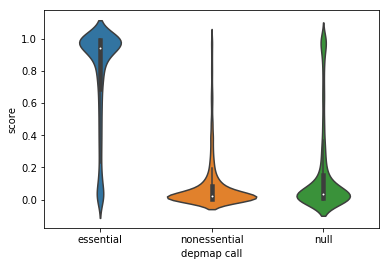

In [71]:
# begin validating depmap calls and demeter
# do they correlate?
depvalid = depmap[list(set(depmap.columns).intersection(demetr.columns))] 
demvalid = demetr[list(set(depmap.columns).intersection(demetr.columns))] 
depnull = depvalid.sample(frac=1).set_index(depvalid.index, drop=True)

#get demeter scores that are depmap-essential
essential = demvalid[depvalid ==1].values.flatten() # dep-essential
essential = essential[~np.isnan(essential)]
nonessential= demvalid[depvalid ==0].dropna().values # dep-nonessential
nonessential = nonessential[~np.isnan(nonessential)]
null = demvalid[depnull ==1].values.flatten()  # dep-nullessential
null = null[~np.isnan(null)]

rownum = min(len(essential), len(nonessential))
essential=np.random.choice(essential, rownum)
nonessential=np.random.choice(nonessential, rownum)
null=np.random.choice(null, rownum)
print('essential vs nonessential', scipy.stats.ttest_ind(essential, nonessential))
print('essential vs nonessential', scipy.stats.ks_2samp(essential, nonessential))


depmap_demeter_df = pd.concat([pd.DataFrame({'score':null, 'depmap call': 'null'}),
           pd.DataFrame({'score':essential, 'depmap call': 'essential'}),
           pd.DataFrame({'score':nonessential, 'depmap call': 'nonessential'})])
                    
%matplotlib inline
sns.violinplot(x='depmap call', y='score', data=depmap_demeter_df, order=['essential','nonessential','null'])


In [15]:
tips = sns.load_dataset("tips")
tips.head()


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

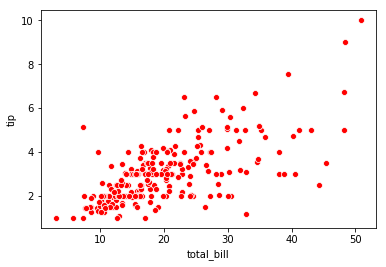

In [27]:
%matplotlib inline
sns.scatterplot(x=tips["total_bill"], y=tips["tip"], color='red')